In [1]:
import re
file_path = 'result_classification615.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

def list2str(l):
    s = ''
    for ll in l:
        s+=ll
    return s
accuracies = []
models = []
elayers =[]
filters =[]
itrs = []
ids = []
seq_len = []
fcs = []
dls = []
for line in lines:
    if line.startswith('accuracy:'):
        accuracy = float(line.split(':')[1])
        accuracies.append(accuracy)
    if line.startswith('classification'):
        pattern_model = r'classification_bone_c_(.*?)_bone_drill_c'
        model = list2str(re.findall(pattern_model, ''.join(line)))
        
        pattern_elayer = r'el(\d+)_'
        elayer = list2str(re.findall(pattern_elayer, ''.join(line)))
        
        pattern_dlayer = r'dl(\d+)_'
        dl = list2str(re.findall(pattern_dlayer, ''.join(line)))
        
        pattern_seq = r'sl(\d+)_'
        seq = list2str(re.findall(pattern_seq, ''.join(line)))
        
        pattern_fc = r'fc(\d+)_eb'
        fc = list2str(re.findall(pattern_fc, ''.join(line)))
        
#         start_index = line.index("'Exp'") + len("'Exp'")
        start_index = line.index('Exp') + len('Exp')
        info = line[start_index+1:]
        filter_type = info.split('_')[0]
        itr = int(info.split('_')[-1])
        # 这个地方很奇怪，不知道后面还多了点啥，可能是空格
        ids.append(model+elayer+dl+filter_type+seq+'_'+fc)
        models.append(model)
        elayers.append(elayer)
        dls.append(dl)
        filters.append(filter_type)
        itrs.append(itr)
        seq_len.append(seq)
        fcs.append(fc)
        # print(line[:-5])
        #print(model,elayer,filter_type,itr)

#print('Accuracies:', accuracies)
print(len(accuracies),len(models),len(ids),)

600 600 600


In [2]:
190/5

38.0

In [3]:
import pandas as pd
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)


In [4]:

df = pd.DataFrame({"model": models,
                   "elayer": elayers,
                   'dlayer':dls,
                   "filter":filters,
                   "iter":itrs,
                   "acc":accuracies,
                   'id':ids,
                   'fc':fcs,
                   'seq_len':seq_len})
df

,model,elayer,dlayer,filter,iter,acc,id,fc,seq_len
0,Autoformer,2,1,mean,0,0.306428,Autoformer21mean250_2,2,250
1,Autoformer,2,1,mean,1,0.339553,Autoformer21mean250_2,2,250
2,Autoformer,2,1,mean,2,0.424067,Autoformer21mean250_2,2,250
3,Autoformer,2,1,mean,3,0.392439,Autoformer21mean250_2,2,250
4,Autoformer,2,1,mean,4,0.492782,Autoformer21mean250_2,2,250
5,Autoformer,2,1,mean,5,0.312407,Autoformer21mean250_2,2,250
6,Autoformer,2,1,mean,6,0.317561,Autoformer21mean250_2,2,250
7,Autoformer,2,1,mean,7,0.403153,Autoformer21mean250_2,2,250
8,Autoformer,2,1,mean,8,0.394781,Autoformer21mean250_2,2,250
9,Autoformer,2,1,mean,9,0.473753,Autoformer21mean250_2,2,250


In [5]:
# import pandas as pd

# # 创建示例DataFrame
# data = {'id': [1, 1, 1, 2, 2, 2],
#         'name': ['John', 'Alice', 'Tom', 'Mike', 'Sarah', 'Emily'],
#         'value': [10, 15, 12, 8, 7, 9]}
# df = pd.DataFrame(data)

# # 选择最后一个name，并对'value'列进行平均值计算
# df_avg = df.groupby('id').agg({'name': 'last', 'value': 'mean'}).reset_index()

# print(df_avg)



In [6]:
df_res = df.groupby('id').agg({'model': 'last',
                               'elayer': 'last',
                               'filter': 'last',
                               'seq_len':'last',
                               'dlayer':'last',
                               'fc':'last',
                               'acc': 'mean'}).reset_index()
df_res['model'] = df_res['model'].replace('Nonstationary_Transformer', 'NSformer')
df_res

,id,model,elayer,filter,seq_len,dlayer,fc,acc
0,Autoformer21mean1000_2,Autoformer,2,mean,1000,1,2,0.407337
1,Autoformer21mean250_2,Autoformer,2,mean,250,1,2,0.385692
2,Autoformer21mean500_2,Autoformer,2,mean,500,1,2,0.391360
3,Crossformer21mean1000_2,Crossformer,2,mean,1000,1,2,0.656558
4,Crossformer21mean250_2,Crossformer,2,mean,250,1,2,0.654480
5,Crossformer21mean500_2,Crossformer,2,mean,500,1,2,0.653774
6,DLinear21mean1000_2,DLinear,2,mean,1000,1,2,0.577781
7,DLinear21mean250_2,DLinear,2,mean,250,1,2,0.588379
8,DLinear21mean500_2,DLinear,2,mean,500,1,2,0.593384
9,FEDformer21mean1000_2,FEDformer,2,mean,1000,1,2,0.404205


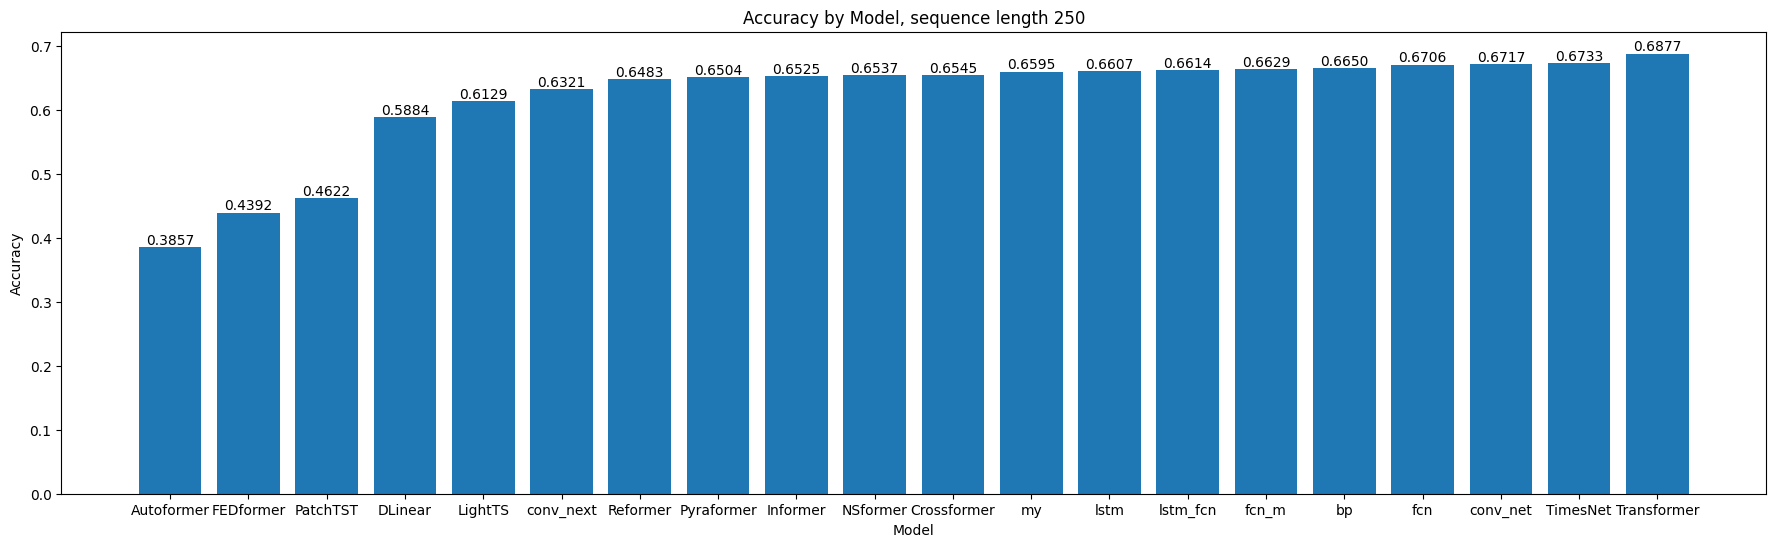

In [14]:
import matplotlib.pyplot as plt
df_new = df_res[df_res['seq_len']=='250']
df_new = df_new.sort_values('acc')

# 设置横纵坐标
x = df_new['model']
y = df_new['acc']

fig = plt.figure(figsize=(22, 6))
# 绘制柱状图
plt.bar(x, y)
for i, v in enumerate(df_new['acc']):
    plt.annotate(f'{v:.4f}', (i, v), ha='center', va='bottom')
# 添加标题和坐标轴标签
plt.title('Accuracy by Model, sequence length 250')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.savefig('parse_res/250.jpg')
# 显示图形
plt.show()

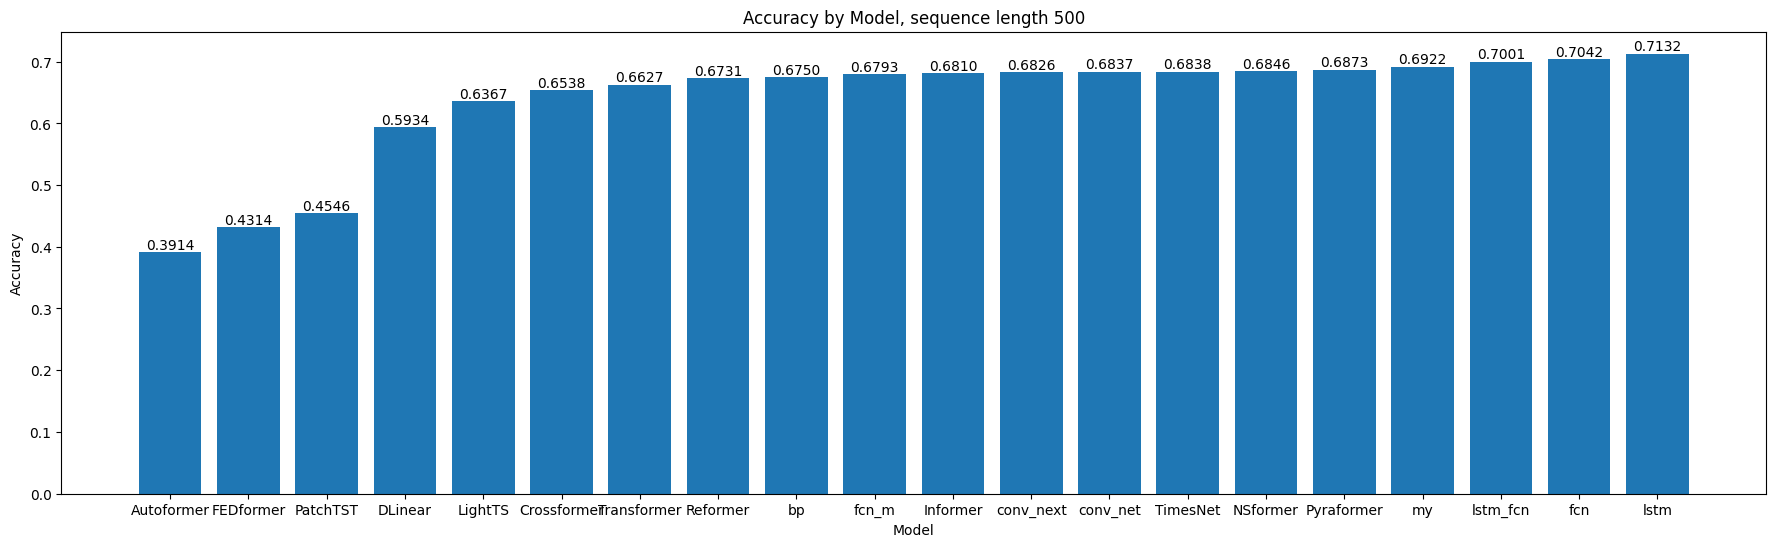

In [13]:
df_new = df_res[df_res['seq_len']=='500']
df_new = df_new.sort_values('acc')

# 设置横纵坐标
x = df_new['model']
y = df_new['acc']

fig = plt.figure(figsize=(22, 6))
# 绘制柱状图
plt.bar(x, y)
for i, v in enumerate(df_new['acc']):
    plt.annotate(f'{v:.4f}', (i, v), ha='center', va='bottom')
# 添加标题和坐标轴标签
plt.title('Accuracy by Model, sequence length 500')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.savefig('parse_res/500.jpg')
# 显示图形
plt.show()

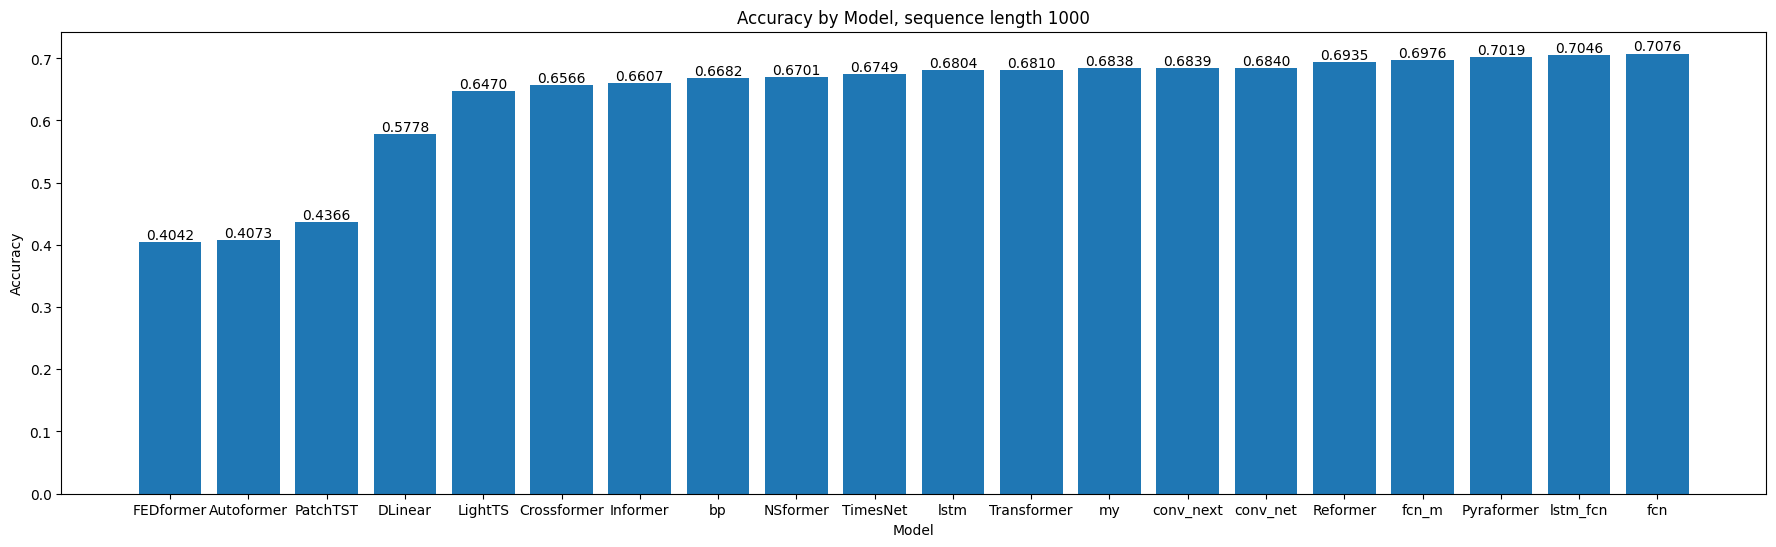

In [12]:
df_new = df_res[df_res['seq_len']=='1000']
df_new = df_new.sort_values('acc')

# 设置横纵坐标
x = df_new['model']
y = df_new['acc']

fig = plt.figure(figsize=(22, 6))
# 绘制柱状图
plt.bar(x, y)
for i, v in enumerate(df_new['acc']):
    plt.annotate(f'{v:.4f}', (i, v), ha='center', va='bottom')
# 添加标题和坐标轴标签
plt.title('Accuracy by Model, sequence length 1000')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.savefig('parse_res/1000.jpg')
# 显示图形
plt.show()

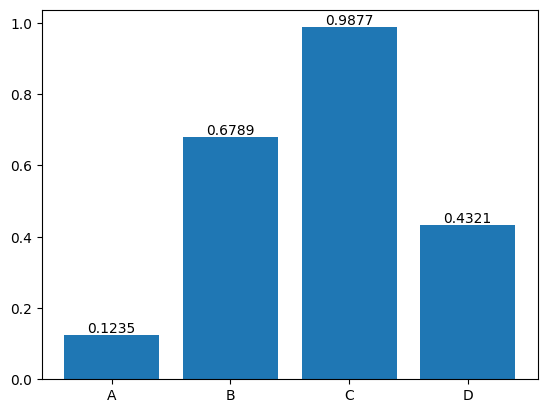

In [11]:

import pandas as pd
import matplotlib.pyplot as plt

# 创建示例DataFrame
data = {'Name': ['A', 'B', 'C', 'D'],
        'Value': [0.12345, 0.6789, 0.98765, 0.4321]}

df = pd.DataFrame(data)

# 绘制柱状图
plt.bar(df['Name'], df['Value'])

# 在每个柱上显示数值
for i, v in enumerate(df['Value']):
    plt.annotate(f'{v:.4f}', (i, v), ha='center', va='bottom')

# 显示图形
plt.show()


In [9]:
df_res.to_excel('res3.xlsx')

In [102]:
dff = df[-5::]
dff



,model,elayer,filter,iter,acc
140,my,2,mean,0,0.713115
141,my,2,mean,1,0.690265
142,my,2,mean,2,0.711864
143,my,2,mean,3,0.684685
144,my,2,mean,4,0.649123


In [103]:
dff['acc'].mean()

0.6898104278611829

In [59]:
# 设置种子为当前时间戳
random.seed(0)

In [67]:
import random


# 生成随机整数
for i in range(5):
    random_number = random.randint(1, 100)
    print(random_number)




56
41
79
82
27


In [ ]:
3592042239
1736050280
3686380748
2704801039
2336936075

In [69]:
[1,2,3]+[1]

[1, 2, 3, 1]

In [71]:
a = [1,2,3,4,5]
a[0:0]

[]

In [72]:
a[0:0]+[1]

[1]

- 250
- 0.6780735811118614
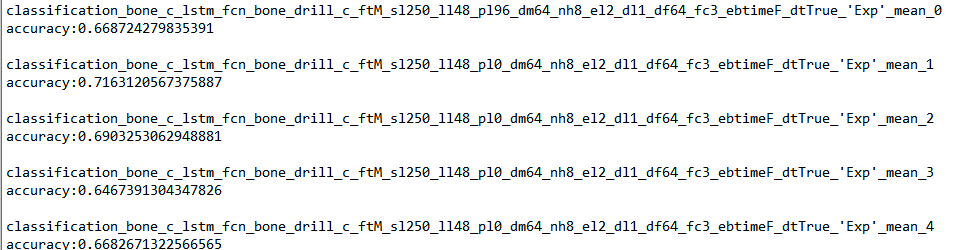

 - 500
 - 0.6940652338798191
 - 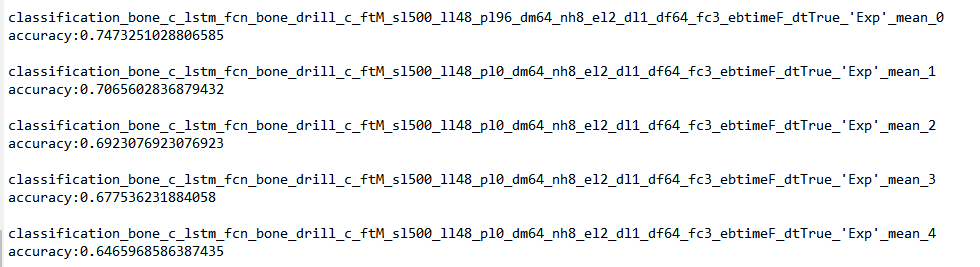

- 1000
- 0.7211055319220417
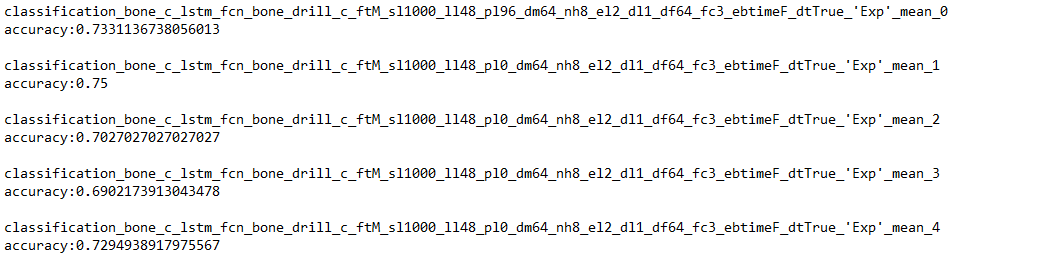

In [78]:
1000 0.7207143405426363
500 0.7030719195186041
250 0.6788877469978118

0.6780735811118614

250 0.699 使用12个，上面的都是使用6个时候
500 0.6898104278611829， 这个是使用部分数据集训练的